In [14]:
import pandas as pd

# Wczytanie danych
df = pd.read_csv('sport.csv')

# Wyświetlenie podstawowych informacji
print(df.head())
print(df.info())


   Unnamed: 0  sex        date  age  height  weight discipline  AeT  AnT  \
0           0    1  2023-07-21   45     184    81.0    running  128  157   
1           1    0  2023-08-04   33     171    64.0    running  171  184   
2           2    1  2023-08-04   38     185    72.0    running  157  178   
3           3    1  2023-08-04   37     182    81.0  triathlon  134  176   
4           4    1  2023-08-02   40     175    72.0    running  139  158   

   vo2max  ...  hr_18  la_18  hr_20  la_20  hr_22  la_22   z2   z3   z4   z5  
0    56.3  ...  165.0   12.3    NaN    NaN    NaN    NaN  121  129  149  158  
1    52.8  ...  197.0    NaN    NaN    NaN    NaN    NaN  154  172  178  185  
2    56.2  ...  178.0    3.6    NaN    NaN    NaN    NaN  138  158  167  179  
3    53.3  ...  180.0    NaN    NaN    NaN    NaN    NaN  123  135  162  177  
4    58.7  ...    NaN    NaN    NaN    NaN    NaN    NaN  126  140  152  159  

[5 rows x 38 columns]
<class 'pandas.core.frame.DataFrame'>
RangeInd

In [15]:
df = df.drop(columns=['Unnamed: 0'])


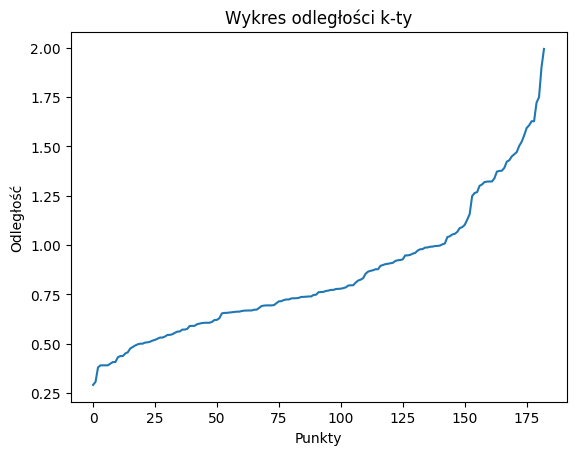

Wykryte klastry: 5
Liczba punktów szumowych: 150


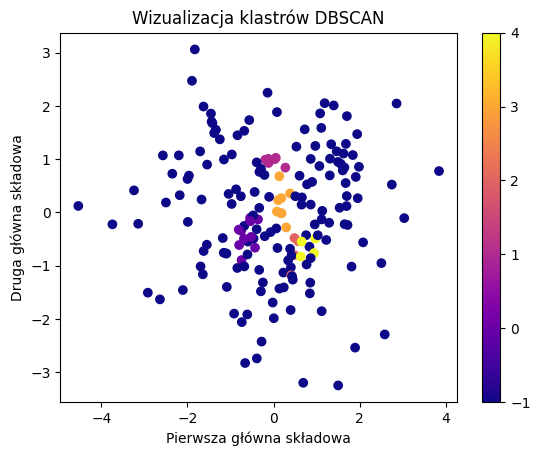

In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors

# Wypełnianie brakujących wartości
df['weight'] = df['weight'].fillna(df['weight'].mean())
df['height'] = df['height'].fillna(df['height'].mean())

# Wybór cech do klasteryzacji
features = df[['age', 'height', 'weight', 'vo2max']]

# Normalizacja danych
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Analiza k-distance
neighbors = NearestNeighbors(n_neighbors=4)  # min_samples = 4
neighbors_fit = neighbors.fit(scaled_features)
distances, indices = neighbors_fit.kneighbors(scaled_features)

# Sortowanie i rysowanie wykresu odległości k-tej
distances = np.sort(distances[:, 3], axis=0)
plt.plot(distances)
plt.title('Wykres odległości k-ty')
plt.xlabel('Punkty')
plt.ylabel('Odległość')
plt.show()

# Ustalenie wartości eps i min_samples
eps_value = 0.5  # Ustalona wartość
min_samples_value = 4  # Ustalona wartość

# Zastosowanie DBSCAN
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
clusters = dbscan.fit_predict(scaled_features)

# Dodanie wyników klasteryzacji do DataFrame
df['cluster'] = clusters

# Sprawdzenie wyników klasteryzacji
num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
print(f'Wykryte klastry: {num_clusters}')
print(f'Liczba punktów szumowych: {list(clusters).count(-1)}')

# Wizualizacja klastrów
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_features)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='plasma')
plt.title('Wizualizacja klastrów DBSCAN')
plt.xlabel('Pierwsza główna składowa')
plt.ylabel('Druga główna składowa')
plt.colorbar()
plt.show()


In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# Wczytaj dane
file_path = 'sport.csv'
dataset = pd.read_csv(file_path)

# Wybierz kluczowe cechy do analizy
features = ['age', 'height', 'weight', 'AeT', 'AnT', 'vo2max']
data = dataset[features].dropna()  # Usuń brakujące wartości

# Standaryzacja danych
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


In [18]:
# Ustawienie parametrów DBSCAN
eps = 0.5  # Maksymalna odległość dla klastra
min_samples = 5  # Minimalna liczba punktów w sąsiedztwie

# Stworzenie i dopasowanie modelu DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(data_scaled)

# Dodaj wynik do oryginalnego DataFrame
data['Cluster'] = clusters


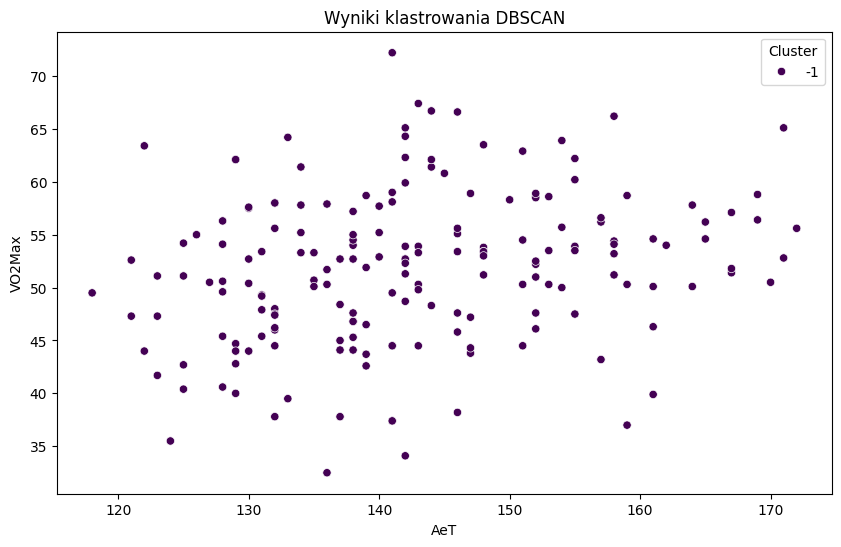

In [19]:
# Tworzenie wykresu wyników
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['AeT'], y=data['vo2max'], hue=data['Cluster'], palette='viridis', legend='full')
plt.title('Wyniki klastrowania DBSCAN')
plt.xlabel('AeT')
plt.ylabel('VO2Max')
plt.legend(title='Cluster')
plt.show()


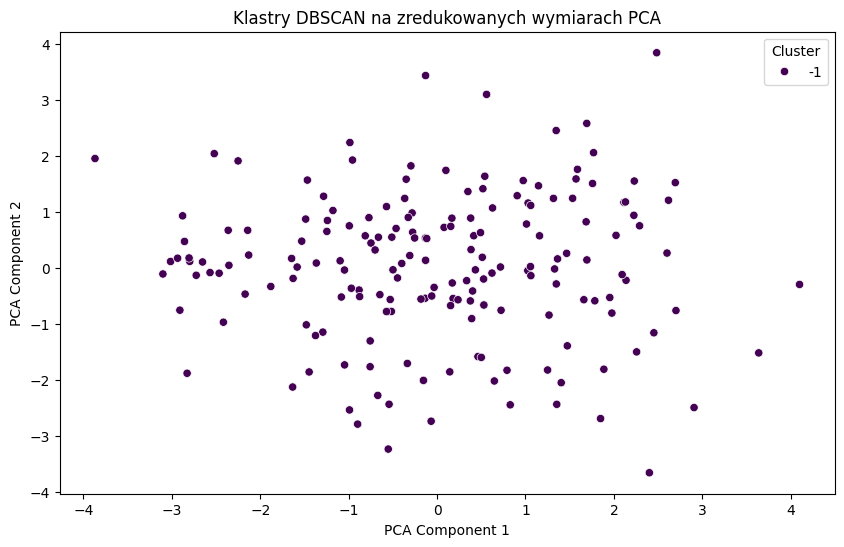

In [20]:
from sklearn.decomposition import PCA

# Redukcja wymiarów za pomocą PCA do 2D
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
data['PCA1'] = data_pca[:, 0]
data['PCA2'] = data_pca[:, 1]

# Wykres PCA z klastrami
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=data, palette='viridis')
plt.title('Klastry DBSCAN na zredukowanych wymiarach PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()
